Streaming output truncated to the last 5000 lines.
[INFO] processed 137/5019, Plastic
[INFO] processed 138/5019, Plastic
[INFO] processed 139/5019, Plastic
[INFO] processed 140/5019, Plastic
[INFO] processed 141/5019, Plastic
[INFO] processed 142/5019, Plastic
[INFO] processed 143/5019, Plastic
[INFO] processed 144/5019, Plastic
[INFO] processed 145/5019, Plastic
[INFO] processed 146/5019, Plastic
[INFO] processed 147/5019, Plastic
[INFO] processed 148/5019, Plastic
[INFO] processed 149/5019, Plastic
[INFO] processed 150/5019, Plastic
[INFO] processed 151/5019, Plastic
[INFO] processed 152/5019, Plastic
[INFO] processed 153/5019, Plastic
[INFO] processed 154/5019, Plastic
[INFO] processed 155/5019, Plastic
[INFO] processed 156/5019, Plastic
[INFO] processed 157/5019, Plastic
[INFO] processed 158/5019, Plastic
[INFO] processed 159/5019, Plastic
[INFO] processed 160/5019, Plastic
[INFO] processed 161/5019, Plastic
[INFO] processed 162/5019, Plastic
[INFO] processed 163/5019, Plastic
[INF

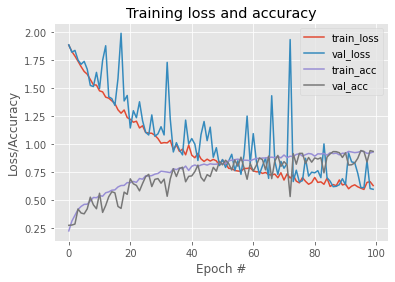

In [2]:
from google.colab import drive 
drive.mount('/content/drive')
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_list = drive.ListFile(
    {'q': "'1ZQeS3F0HBwiEY0c3MLlMpnn7l_raK_6d' in parents"}).GetList()
from google.colab import auth
from oauth2client.client import GoogleCredentials
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python.keras.optimizers import SGD
from tensorflow.python.keras.preprocessing.image import img_to_array
from tensorflow.python.keras.regularizers import l2
from tensorflow.python.keras.regularizers import l1
from tensorflow.python.keras import regularizers

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
import tensorflow as tf

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.python.keras.layers.core import Activation
from tensorflow.python.keras.layers.core import Flatten
from tensorflow.python.keras.layers.core import Dense
from keras import backend as K
num=0
print("Loading Images")
imagePaths = list(paths.list_images("/content/drive/My Drive/By_Contaminent_Select"))
print(imagePaths)
verbose=-1
data = []
labels = []

# loop over the input images
for (i, imagePath) in enumerate(imagePaths):
  image = cv2.imread(imagePath)
  label = imagePath.split(os.path.sep)[-2]
  image=cv2.resize(image, (32, 32),
  interpolation=cv2.INTER_AREA)
  image=img_to_array(image, None)
  data.append(image)
  labels.append(label)
  print("[INFO] processed {}/{}, {}".format(i + 1, len(imagePaths), label))


data= np.array(data)
labels = np.array(labels)
data = data.astype("float")/255.0
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

print("Compiling Model")
opt = tf.keras.optimizers.SGD(lr=0.005)
model = Sequential()
inputShape = (32, 32, 3)

if K.image_data_format() == "channels_first":
  inputShape = (3, 32, 32)

model.add(Conv2D(32, (3, 3), padding="same",
input_shape=inputShape))
model.add(Activation("relu"))
model.add(Flatten())
model.add(Dense(6, input_dim=3072, kernel_regularizer=regularizers.l2(0.01),  activity_regularizer=regularizers.l1(0.01)))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

print("Training network")
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=50, epochs=100, verbose=-1)
print("Evaluating network")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=["Clean", "Salt", "Soil", "Sand", "Algae", "Plastic"]))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,100), H.history["val_accuracy"], label="val_acc")
plt.title("Training loss and accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()